In [1]:
import pandas as pd

In [11]:
import numpy as numpy

In [3]:
data = pd.read_csv('data.csv', delimiter=',')
data.describe()
data.head(10)

C:\Users\Daria\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
data['DebtRatio'] = data['DebtRatio'] * data['MonthlyIncome'].fillna(1)

In [5]:
data = data.rename(columns={'DebtRatio' : 'Debt'})

In [6]:
data.head(10)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,Debt,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,7323.197016,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,316.878123,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,258.914887,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,118.963951,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,1584.975094,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,1314.624392,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,734.790059,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,14359.393699,23684.0,9,0,4,0,2.0


In [7]:
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean())

In [8]:
data['SeriousDlqin2yrs'].groupby(data['NumberOfDependents']).mean()

NumberOfDependents
0.0    0.041397
1.0    0.089844
2.0    0.110465
3.0    0.057143
4.0    0.033333
5.0    0.000000
6.0    0.000000
8.0    0.000000
Name: SeriousDlqin2yrs, dtype: float64

In [9]:
data['SeriousDlqin2yrs'].groupby(data['NumberRealEstateLoansOrLines']).mean()

NumberRealEstateLoansOrLines
0    0.056863
1    0.048729
2    0.063158
3    0.145455
4    0.105263
5    0.000000
6    1.000000
8    0.000000
Name: SeriousDlqin2yrs, dtype: float64

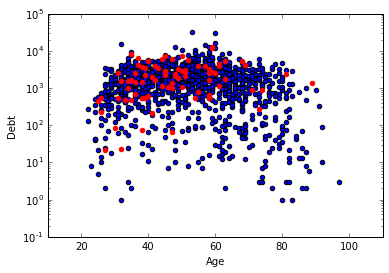

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
i0 = (data['SeriousDlqin2yrs'] == 0) & (data['Debt'] > 0) 
i1 = (data['SeriousDlqin2yrs'] == 1) & (data['Debt'] > 0) 
fig, ax = plt.subplots() 
ax.set_yscale('log') 
ax.set_xlabel('Age') 
ax.set_ylabel('Debt') 
ax.scatter(data.ix[i0,'age'],data.ix[i0,'Debt']) 
ax.scatter(data.ix[i1,'age'],data.ix[i1, 'Debt'], color='red') 
plt.show()

(0, 25000)

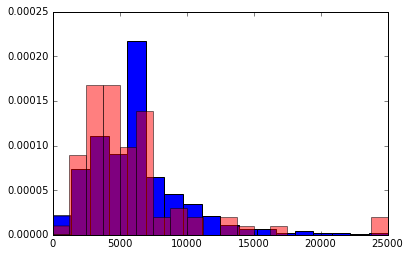

In [18]:
plt.hist(data.ix[i0, 'MonthlyIncome'], bins=150, color='b', normed=True) 
plt.hist(data.ix[i1, 'MonthlyIncome'], bins=20, color='r', normed=True, alpha=0.5) 
plt.xlim([0, 25000])